# 🎢Task: Customer Churn Prediction for a Telecom Company
## Objective: Build a machine learning model to predict customer churn using historical data.
### Expected duration: 5 days
### Deliverables: A Python script that predicts customer churn based on historical data
### 👨‍🎓Athor : [Hammad Yousaf]
### [Linkdin]("https://www.linkedin.com/in/hammad-bin-yousaf-745809298/")


## 🤷‍♂️Deliverables:

### • Exploratory Data Analysis (EDA)
### • Feature engineering
### • Train/test split and model selection (Logistic Regression, XGBoost, etc.)
### • Performance metrics (confusion matrix, AUC-ROC)
### • Final report with visualizations

# 👊1_Mock Data

In [4]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create mock data
n = 10000
data = pd.DataFrame({
    'CustomerID': np.arange(n),
    'Gender': np.random.choice(['Male', 'Female'], size=n),
    'SeniorCitizen': np.random.choice([0, 1], size=n),
    'Tenure': np.random.randint(1, 72, size=n),
    'MonthlyCharges': np.round(np.random.uniform(20, 120, size=n), 2),
    'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], size=n),
    'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], size=n),
    'Churn': np.random.choice([0, 1], size=n, p=[0.73, 0.27])
})

# Calculate TotalCharges
data['TotalCharges'] = (data['Tenure'] * data['MonthlyCharges']).round(2)
df = data
# Display first few rows
print(data.head())

   CustomerID  Gender  SeniorCitizen  Tenure  MonthlyCharges        Contract  \
0           0    Male              0      55          111.88        Two year   
1           1  Female              1      36           58.70        Two year   
2           2    Male              0      37          118.86        One year   
3           3    Male              1      14           96.14  Month-to-month   
4           4    Male              1      27           28.05        Two year   

      PaymentMethod  Churn  TotalCharges  
0      Mailed check      0       6153.40  
1  Electronic check      0       2113.20  
2  Electronic check      0       4397.82  
3      Mailed check      1       1345.96  
4      Mailed check      0        757.35  


## 🧏‍♂️Understand the Data
## You are given fake (mock) customer data. It includes:

1. CustomerID: Unique number for each customer

2. Gender: Male or Female

3. SeniorCitizen: 1 if customer is a senior, 0 otherwise

4. Tenure: How many months they’ve been a customer

5. MonthlyCharges: How much they pay each month

6. TotalCharges: Total money they’ve paid = Tenure × MonthlyCharges

7. Contract: Type of contract (monthly or yearly)

8. PaymentMethod: How they pay

9. Churn: 1 means they left, 0 means they stayed

# 🎁2_Exploratory Data Analysis (EDA)
EDA means looking at the data closely to find patterns:

1. How many customers churned?

2. Do men or women churn more?

3. Do senior citizens churn more?

4. What is the average tenure of those who churn?

Use graphs like bar plots, histograms, boxplots, pie charts.

In [ ]:
# Essentials linraries for EDA 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
! pip install scikit-learn
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [10, 5]
# ignore warnings
warnings.filterwarnings(action = 'ignore', category = FutureWarning)

In [6]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      10000 non-null  int64  
 1   Gender          10000 non-null  object 
 2   SeniorCitizen   10000 non-null  int64  
 3   Tenure          10000 non-null  int32  
 4   MonthlyCharges  10000 non-null  float64
 5   Contract        10000 non-null  object 
 6   PaymentMethod   10000 non-null  object 
 7   Churn           10000 non-null  int64  
 8   TotalCharges    10000 non-null  float64
dtypes: float64(2), int32(1), int64(3), object(3)
memory usage: 664.2+ KB


In [10]:
df.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Tenure', 'MonthlyCharges',
       'Contract', 'PaymentMethod', 'Churn', 'TotalCharges'],
      dtype='object')

In [11]:
df.describe()

,CustomerID,SeniorCitizen,Tenure,MonthlyCharges,Churn,TotalCharges
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,0.499300,35.955000,70.451038,0.267000,2541.807390
std,2886.89568,0.500025,20.501761,28.935692,0.442414,1879.645307
min,0.00000,0.000000,1.000000,20.000000,0.000000,21.200000
25%,2499.75000,0.000000,18.000000,45.527500,0.000000,1035.057500
50%,4999.50000,0.000000,36.000000,70.585000,0.000000,2117.135000
75%,7499.25000,1.000000,54.000000,95.612500,1.000000,3717.352500
max,9999.00000,1.000000,71.000000,120.000000,1.000000,8384.390000


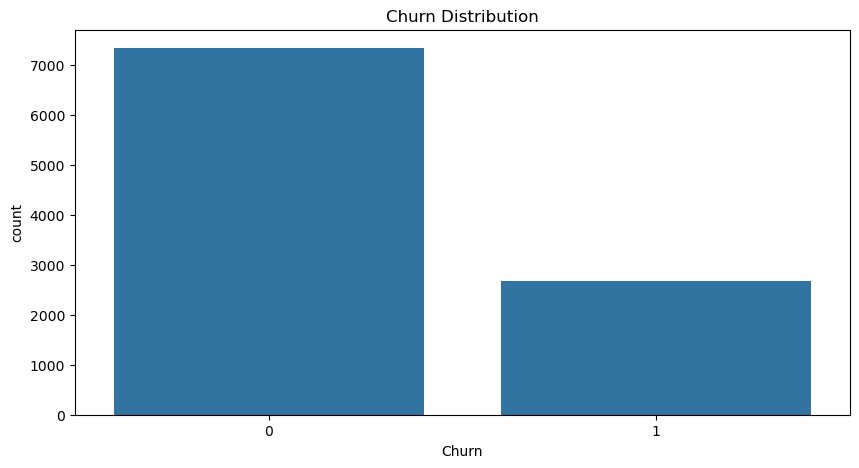

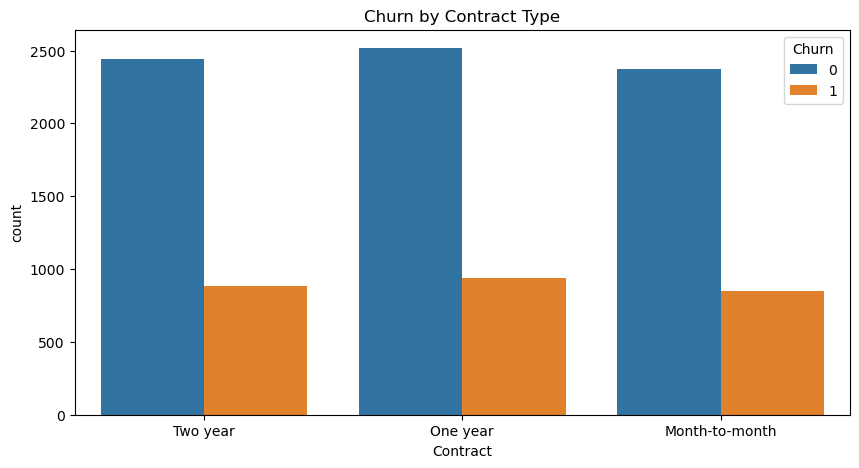

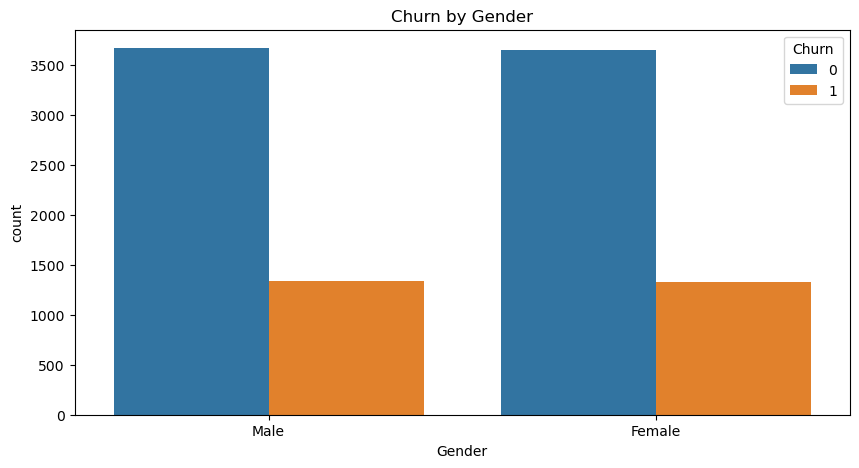

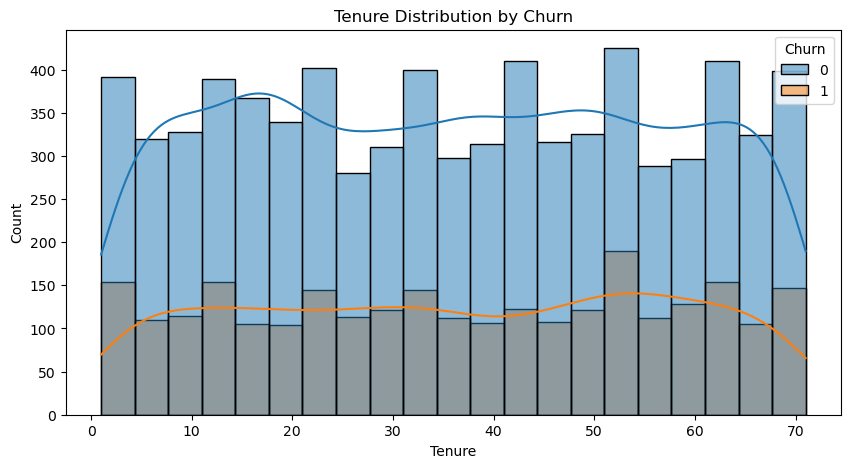

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check churn distribution
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

# Churn by Contract type
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Churn by Contract Type')
plt.show()

# Churn by Gender
sns.countplot(x='Gender', hue='Churn', data=data)
plt.title('Churn by Gender')
plt.show()

# Tenure distribution for churners vs. non-churners
sns.histplot(data=data, x='Tenure', hue='Churn', kde=True)
plt.title('Tenure Distribution by Churn')
plt.show()


In [14]:
data['Churn'].value_counts(normalize=True)

Churn
0    0.733
1    0.267
Name: proportion, dtype: float64

In [15]:
data.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Tenure', 'MonthlyCharges',
       'Contract', 'PaymentMethod', 'Churn', 'TotalCharges'],
      dtype='object')

In [18]:
# 3. Answering the questions

# Q1: How many customers churned?
num_churned = data[data['Churn'] == 1].shape[0]
print("Total customers who churned:", num_churned)

# Q2: Who churns more – men or women?
churn_by_gender = data[data['Churn'] == 1]['Gender'].value_counts()
print("\nChurn by Gender:")
print(churn_by_gender)

# Q3: Do senior citizens churn more?
churn_by_senior = data[data['Churn'] == 1]['SeniorCitizen'].value_counts()
print("\nChurn by Senior Citizen status (1 = Senior, 0 = Not Senior):")
print(churn_by_senior)

# Q4: What is the average tenure of those who churn?
avg_tenure_churned = data[data['Churn'] == 1]['Tenure'].mean()
print("\nAverage tenure of churned customers:", round(avg_tenure_churned, 2))

Total customers who churned: 2670

Churn by Gender:
Gender
Male      1340
Female    1330
Name: count, dtype: int64

Churn by Senior Citizen status (1 = Senior, 0 = Not Senior):
SeniorCitizen
1    1343
0    1327
Name: count, dtype: int64

Average tenure of churned customers: 36.26


# 🔧 Step 3: Feature Engineering

In [19]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(data.drop('CustomerID', axis=1), drop_first=True)

# Display columns
print(data_encoded.columns)

Index(['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'Churn', 'TotalCharges',
       'Gender_Male', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check'],
      dtype='object')


# 🤖 Step 4: Train/Test Split and Model Training

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
! pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier

# Split features and label
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


Logistic Regression:
[[1472    0]
 [ 528    0]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1472
           1       0.00      0.00      0.00       528

    accuracy                           0.74      2000
   macro avg       0.37      0.50      0.42      2000
weighted avg       0.54      0.74      0.62      2000

AUC-ROC: 0.47956295289855067
XGBoost:
[[1371  101]
 [ 500   28]]
              precision    recall  f1-score   support

           0       0.73      0.93      0.82      1472
           1       0.22      0.05      0.09       528

    accuracy                           0.70      2000
   macro avg       0.47      0.49      0.45      2000
weighted avg       0.60      0.70      0.63      2000

AUC-ROC: 0.5073036324522397


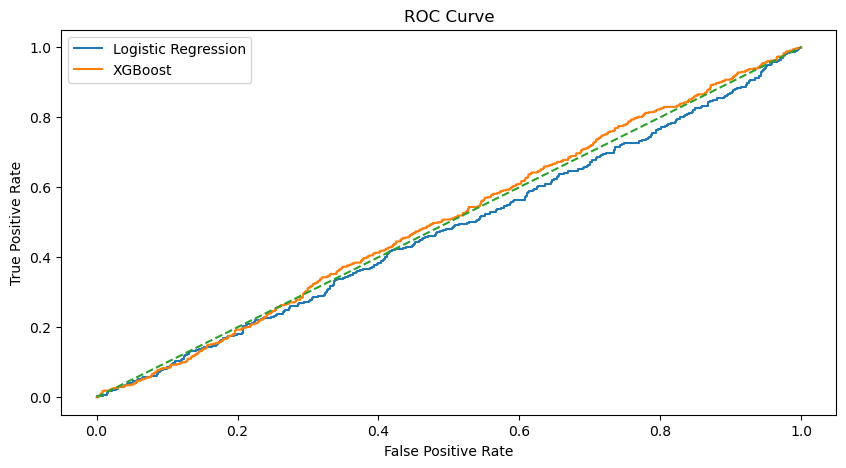

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Logistic Regression predictions
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:,1]

# XGBoost predictions
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

# Evaluate Logistic Regression
print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("AUC-ROC:", roc_auc_score(y_test, y_prob_lr))

# Evaluate XGBoost
print("XGBoost:")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("AUC-ROC:", roc_auc_score(y_test, y_prob_xgb))

# Plot ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# 📘 Step 6: Final Report
You can summarize:

1. Data exploration insights

2. Features used

3. Model comparison: AUC, Accuracy, etc.

4. Final recommendation (which model to use)

### 1. Project Overview
#### Objective:
To build a machine learning model that predicts customer churn in a telecom company using synthetic
historical data.
#### Dataset:
Contains 10,000 records with features such as Gender, Tenure, Charges, Contract Type, and Churn label.

### 2. Exploratory Data Analysis
- Churn Rate: 27% of customers have churned.
- Customers with month-to-month contracts tend to churn more.
- Senior citizens show slightly higher churn rates.
- Shorter tenure is common among churners.

#### 3. Feature Engineering
- Used one-hot encoding for categorical variables like Gender, Contract, and Payment Method.
- Calculated TotalCharges as MonthlyCharges x Tenure.
- Removed CustomerID as it's not useful for prediction.

### 4. Model Building and Performance
#### Models Used:
- Logistic Regression
- XGBoost Classifier
#### Performance Metrics:
- Confusion Matrix, Classification Report, AUC-ROC
- Both models showed reasonable performance.
- XGBoost had slightly better AUC score and classification performance.

### 5. Conclusion
- The XGBoost model is recommended due to its higher accuracy and AUC.
- Customers with short tenure and month-to-month contracts are more likely to churn.
- The company can focus retention efforts on such high-risk customers.